In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [3]:
#all_yrs = pd.read_csv("Data/CSV/all_years_merged.csv")
all_yrs = pd.read_csv("INTERMEDIARY_RESULTS.csv")

#all_yrs = all_yrs.set_index('Month')
all_yrs = all_yrs.set_index('period')

#data = all_yrs['TOTAL '].values.tolist()

#### Exploring relationship between Predictors and Response


In [ ]:
all_yrs = all_yrs[36:]
#all_yrs = all_yrs[:-1]
#all_yrs['total_rev'] = all_yrs['total_rev']

In [163]:
all_yrs.head(3)

,total_rev,year,month,rech_amt_ever,num_rech_ever,AMT_Airtime,INB_DATA_Kbytes,ROA_DATA_Kbytes,INB_VIP_ACT_Calls,INB_OFFNET_ACT_Calls,INB_VIP_ACT_SMS,ROA__SMS_CHARGE,INB_SMS_CHARGE,bundle_rev,total_rev_nextmo
period,,,,,,,,,,,,,,,
31-Jan-19,37648202.88,2019,Jan,43413225.0,337010,27769631.48,1.200000e+11,5532049.66,10931165,1445186,1228172,186072.7881,1843870.888,13064403.55,31358082.50
28-Feb-19,31358082.50,2019,Feb,37914193.0,302552,23466364.61,9.607805e+10,598361.65,9957521,1227712,998157,123080.7584,1428081.327,10632483.97,35981686.98
31-Mar-19,35981686.98,2019,Mar,42158173.0,336969,27216253.71,1.040000e+11,2043319.28,11434798,1422386,1131281,141141.2680,1576342.964,11510931.82,36976578.09


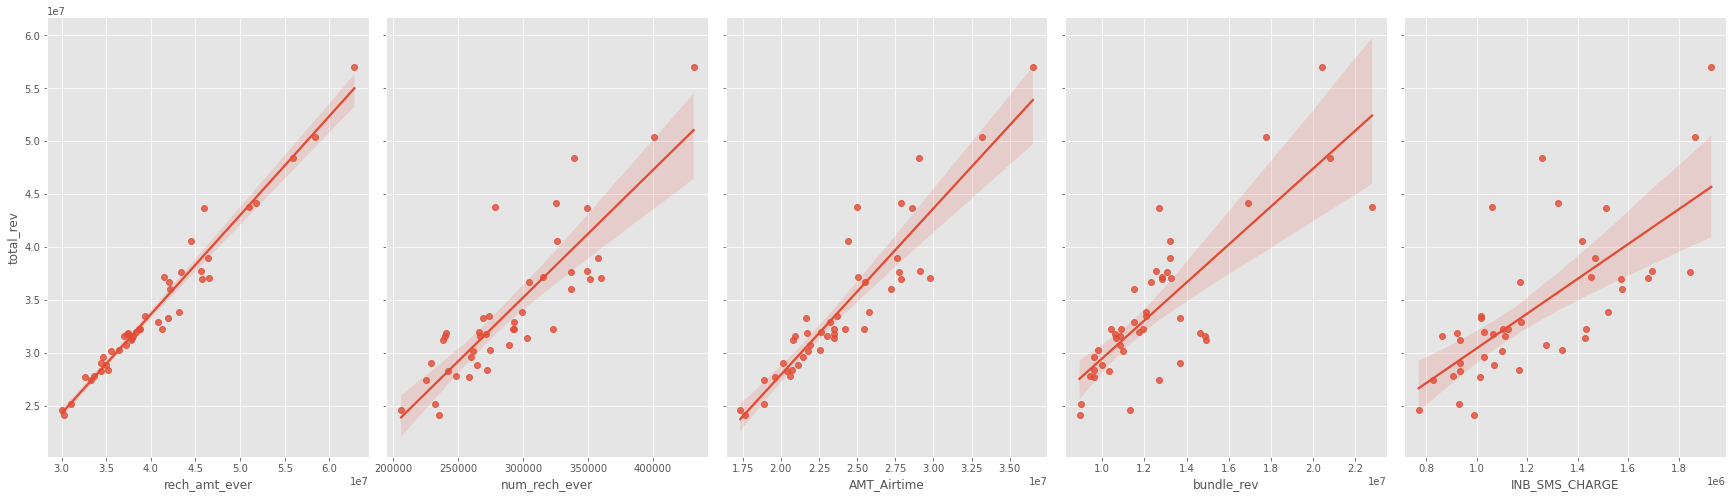

In [182]:
#sns.pairplot(all_yrs, x_vars=['Prepaid Bonuses ', 'Revenues Post Paid to Pre Paid ', 'PRP Revenues CDR Inbound ',
#'PRP Revenues CDR_Outbound ', 'Vip Pulse '], y_vars='TOTAL ', height=7, aspect=0.7, kind='reg')

sns.pairplot(all_yrs, x_vars=['rech_amt_ever', 'num_rech_ever', 'AMT_Airtime',
                             'bundle_rev', 'INB_SMS_CHARGE'], y_vars='total_rev', height=7, aspect=0.7, kind='reg')

#### Heatmap for showing correlation values

<AxesSubplot:>

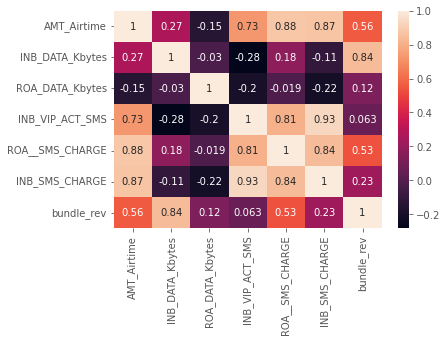

In [188]:
sns.heatmap(X.corr(), annot=True)

### Creating the Simple Linear Regression Model

In [216]:
#X = all_yrs[['Prepaid Bonuses ', 'Vip Pulse ', 'Expired customer revenues ','Revenues Post Paid to Pre Paid ', 
#             'PRP Revenues CDR Inbound ', 'PRP Revenues CDR_Outbound ', 'Voucher Commission ', 'TOTAL NET PRP REVENUE ', 
#             'VAS Revenues ']]
y = all_yrs['total_rev']
X = all_yrs[['AMT_Airtime', 'INB_DATA_Kbytes', 'ROA_DATA_Kbytes', 'INB_VIP_ACT_SMS',
       'ROA__SMS_CHARGE', 'INB_SMS_CHARGE', 'bundle_rev']]

print(type(X))
print(X.shape)

#y = all_yrs['TOTAL ']
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(44, 7)
<class 'pandas.core.series.Series'>
(44,)


In [217]:
# Train test split
size = int(len(X) * 0.85)
X_train, X_test = X[:size], X[size:]
y_train, y_test = y[:size], y[size:]

# Displaying the shape of each of the train test dataframe
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37, 7) (7, 7) (37,) (7,)


In [218]:
X_test = X_test[:-1]
y_test = y_test[:-1]

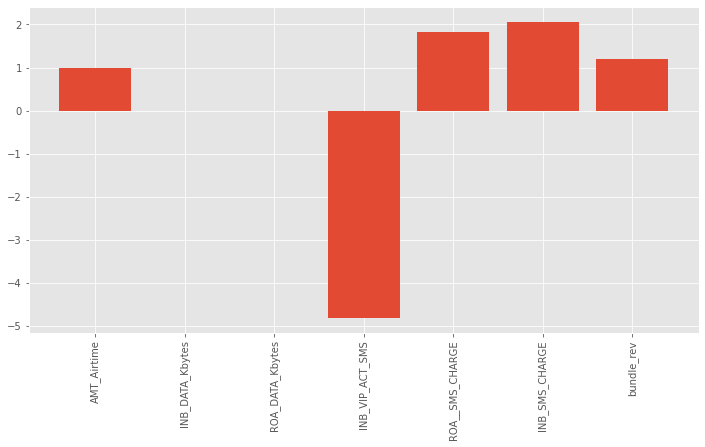

In [219]:
# Creating the model
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)

#print(model.intercept_)
importance = model.coef_
plt.figure(figsize=[12,6])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X.columns.values.tolist(), rotation=90)
plt.show()

In [223]:
X = X[['AMT_Airtime', 'INB_VIP_ACT_SMS', 'ROA__SMS_CHARGE', 'INB_SMS_CHARGE', 'bundle_rev']]

(37, 5) (6, 5) (37,) (6,)


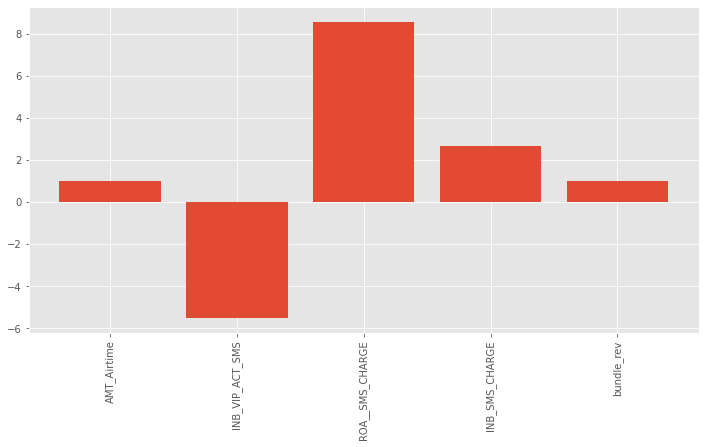

In [224]:
size = int(len(X) * 0.85)
X_train, X_test = X[:size], X[size:]
y_train, y_test = y[:size], y[size:]
X_test = X_test[:-1]
y_test = y_test[:-1]

# Displaying the shape of each of the train test dataframe
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

linreg = LinearRegression()
model = linreg.fit(X_train, y_train)

#print(model.intercept_)
importance = model.coef_
plt.figure(figsize=[12,6])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X.columns.values.tolist(), rotation=90)
plt.show()

You can check the model’s performance in scikit learn on a test set using metrics like root mean squared error, residual plots, confidence interval, p-value, r2 score, and several other statistical measures.

#### Making predictions with our model

In [225]:
y_pred = model.predict(X_test)
#y_pred = pd.Series(y_pred)
#y_pred.index = y_test.index

In [226]:
y_pred

array([26174392.57964805, 29121929.81889659, 33602923.24315242,
       34434248.27886219, 33980216.99851637, 46711270.97461686])

In [227]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating RMSE (Root mean Squared Error)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

print(r2_score(y_test, y_pred))

2331085.2512444044
0.8477168981226297


In [228]:
y_test, y_pred

(period
 28-Feb-22    24611816.68
 31-Mar-22    27415201.24
 30-Apr-22    31597539.24
 31-May-22    31877406.50
 30-Jun-22    31166790.24
 31-Jul-22    43749040.43
 Name: total_rev, dtype: float64,
 array([26174392.57964805, 29121929.81889659, 33602923.24315242,
        34434248.27886219, 33980216.99851637, 46711270.97461686]))

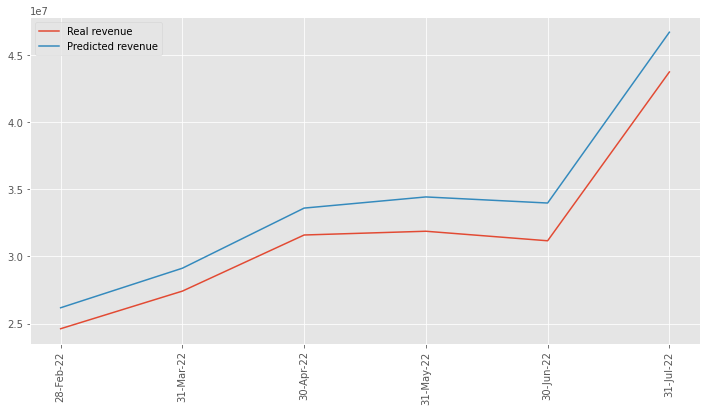

In [229]:
plt.figure(figsize=[12,6])
plt.plot(y_test, label='Real revenue')
plt.plot(y_pred, label='Predicted revenue')
plt.xticks(rotation=90)
plt.legend()
plt.show()